In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


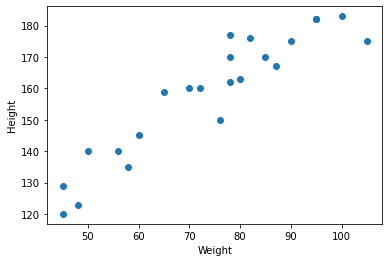

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [7]:
df.corr() ##highly positively correlated

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [8]:
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


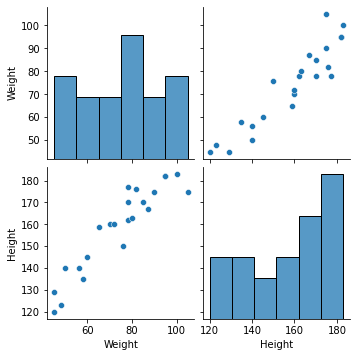

In [9]:
sns.pairplot(df) ## 2 ta kore relation ber kore

In [21]:
## training and test set
## training set must be  dataframe or 2D array
X=df[['Weight']]
type(X)


pandas.core.frame.DataFrame

[0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64]


In [22]:
X_series=df["Weight"]
np.array(X_series).shape

(23,)

In [23]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [48]:
X_test=scaler.transform(X_test)

In [36]:
X_train

array([[ 0.99305983],
       [-0.03929373],
       [ 0.99305983],
       [-1.13237398],
       [-1.86109414],
       [-0.16074709],
       [ 0.50724639],
       [ 1.29669323],
       [ 1.60032663],
       [ 0.68942643],
       [ 0.38579303],
       [-1.73964078],
       [-0.40365382],
       [-1.3752807 ],
       [ 0.20361299],
       [ 0.08215963],
       [-0.03929373]])

In [49]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [50]:
from sklearn.linear_model import LinearRegression

In [53]:
regression=LinearRegression()

In [55]:
regression.fit(X_train,Y_train)

LinearRegression()

In [56]:
regression.coef_

array([17.2982057])

In [57]:
regression.intercept_

156.47058823529412

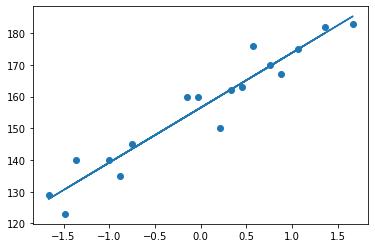

In [60]:
## getting the best fit line

plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [70]:
y_pred=regression.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

## Performance Evaluation

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [69]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [73]:
## r square
from sklearn.metrics import r2_score


<function r2_score at 0x7040efd6a5f0>


In [75]:
r2score=r2_score(Y_test,y_pred)
print(r2score)

0.7360826717981276


## Ols 

In [76]:
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [81]:
regression.predict(scaler.transform([[72]])) ## great misktake. What mistake did we do?

/home/tamim/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])